In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2015-01-15"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2015_1q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2015-01-15,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8160,사상구,8162,사상구,2,0.02%,"8,161"
1,2015-01-15,간장,오복왕표 0.9ℓ 1병,6062,사상구,6250,사상구,188,3.1%,"6,156"
2,2015-01-15,고등어,30㎝정도 500g 1마리,4500,사상구,4690,사상구,190,4.22%,"4,595"
3,2015-01-15,달걀,오경슈퍼란60g정도 10개,2900,사상구,3000,사상구,100,3.45%,"2,950"
4,2015-01-15,닭고기,육계 1.0㎏,6800,사상구,12900,사상구,6100,89.71%,"9,850"
5,2015-01-15,대파,1.0㎏,1800,사상구,2800,사상구,1000,55.56%,"2,300"
6,2015-01-15,돼지고기,삼겹살 500g,7750,사상구,13900,사상구,6150,79.35%,"10,825"
7,2015-01-15,두부,500g 판두부(국산포장두부 420g) 1모,3979,사상구,3984,사상구,5,0.13%,"3,982"
8,2015-01-15,라면,신라면 120g 1봉지,634,사상구,634,사상구,0,0.0%,634
9,2015-01-15,맥주,하이트 500㎖ 1병,1240,사상구,1240,사상구,0,0.0%,"1,240"


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2015-04-09"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2015_2q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2015-04-09,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8581,사상구,14775,사상구,6194,72.18%,"11,678"
1,2015-04-09,간장,오복왕표 0.9ℓ 1병,6061,사상구,6250,사상구,189,3.12%,"6,156"
2,2015-04-09,달걀,오경슈퍼란60g정도 10개,2800,사상구,2900,사상구,100,3.57%,"2,850"
3,2015-04-09,닭고기,육계 1.0㎏,6980,사상구,10900,사상구,3920,56.16%,"8,940"
4,2015-04-09,대파,1.0㎏,3114,사상구,3993,사상구,879,28.23%,"3,554"
5,2015-04-09,돼지고기,삼겹살 500g,12500,사상구,14400,사상구,1900,15.2%,"13,450"
6,2015-04-09,두부,500g 판두부(국산포장두부 420g) 1모,3868,사상구,3978,사상구,110,2.84%,"3,923"
7,2015-04-09,라면,신라면 120g 1봉지,572,사상구,634,사상구,62,10.84%,603
8,2015-04-09,맥주,하이트 500㎖ 1병,1240,사상구,1240,사상구,0,0.0%,"1,240"
9,2015-04-09,무,2.0㎏ 1개,2229,사상구,2360,사상구,131,5.88%,"2,295"


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2015-07-09"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2015_3q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2015-07-09,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8162,사상구,16350,사상구,8188,100.32%,"12,256"
1,2015-07-09,간장,오복왕표 0.9ℓ 1병,6250,사상구,6250,사상구,0,0.0%,"6,250"
2,2015-07-09,고등어,30㎝정도 500g 1마리,3921,사상구,7800,사상구,3879,98.93%,"5,861"
3,2015-07-09,달걀,오경슈퍼란60g정도 10개,2600,사상구,2800,사상구,200,7.69%,"2,700"
4,2015-07-09,닭고기,육계 1.0㎏,8500,사상구,9800,사상구,1300,15.29%,"9,150"
5,2015-07-09,대파,1.0㎏,4000,사상구,4071,사상구,71,1.77%,"4,036"
6,2015-07-09,돼지고기,삼겹살 500g,13800,사상구,14500,사상구,700,5.07%,"14,150"
7,2015-07-09,두부,500g 판두부(국산포장두부 420g) 1모,3868,사상구,3868,사상구,0,0.0%,"3,868"
8,2015-07-09,라면,신라면 120g 1봉지,572,사상구,634,사상구,62,10.84%,603
9,2015-07-09,맥주,하이트 500㎖ 1병,1240,사상구,1240,사상구,0,0.0%,"1,240"


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2015-10-22"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2015_4q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2015-10-22,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8581,사상구,16350,사상구,7769,90.54%,"12,466"
1,2015-10-22,간장,오복왕표 0.9ℓ 1병,6061,사상구,6250,사상구,189,3.12%,"6,156"
2,2015-10-22,고등어,30㎝정도 500g 1마리,4382,사상구,4531,사상구,149,3.4%,"4,457"
3,2015-10-22,달걀,오경슈퍼란60g정도 10개,2600,사상구,2800,사상구,200,7.69%,"2,700"
4,2015-10-22,닭고기,육계 1.0㎏,5800,사상구,5900,사상구,100,1.72%,"5,850"
5,2015-10-22,대파,1.0㎏,3114,사상구,3714,사상구,600,19.27%,"3,414"
6,2015-10-22,돼지고기,삼겹살 500g,13900,사상구,14500,사상구,600,4.32%,"14,200"
7,2015-10-22,두부,500g 판두부(국산포장두부 420g) 1모,3868,사상구,3868,사상구,0,0.0%,"3,868"
8,2015-10-22,라면,신라면 120g 1봉지,634,사상구,634,사상구,0,0.0%,634
9,2015-10-22,맥주,하이트 500㎖ 1병,1240,사상구,1350,사상구,110,8.87%,"1,295"


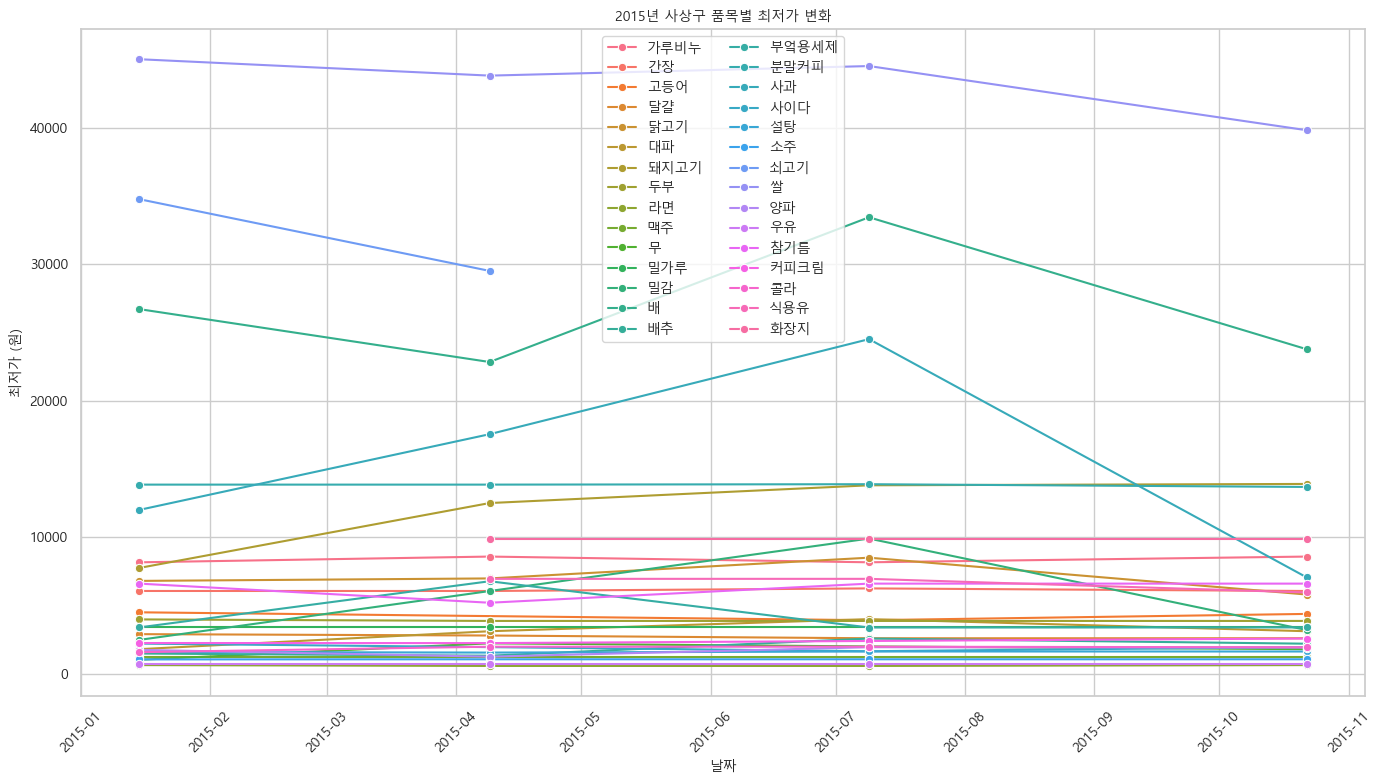

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사상구2015_1q.csv")
q2 = pd.read_csv("사상구2015_2q.csv")
q3 = pd.read_csv("사상구2015_3q.csv")
q4 = pd.read_csv("사상구2015_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2015년 사상구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("사상구2015_min.csv", index=False, encoding="utf-8-sig")

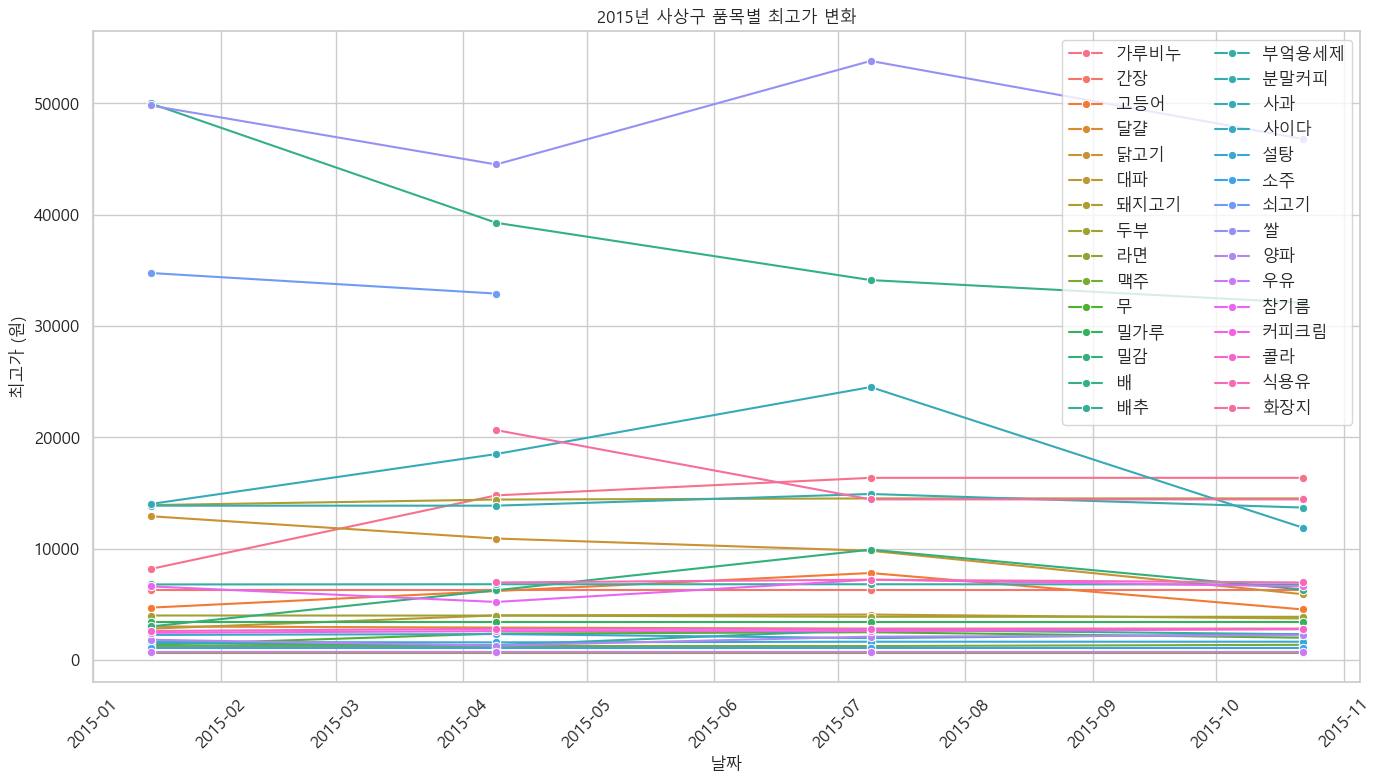

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사상구2015_1q.csv")
q2 = pd.read_csv("사상구2015_2q.csv")
q3 = pd.read_csv("사상구2015_3q.csv")
q4 = pd.read_csv("사상구2015_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2015년 사상구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("사상구2015_max.csv", index=False, encoding="utf-8-sig")